In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns



In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [4]:
df.replace(" ?", np.nan, inplace=True)
df.dropna(inplace=True)
df.drop(columns=["fnlwgt"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education.num   32561 non-null  int64 
 4   marital.status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital.gain    32561 non-null  int64 
 10  capital.loss    32561 non-null  int64 
 11  hours.per.week  32561 non-null  int64 
 12  native.country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [5]:
# Appliquer Label Encoding aux colonnes catégoriques
categorical_columns = df.select_dtypes(include=['object']).columns

for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])
df.head()


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,11,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,15,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,5,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,15,10,5,10,3,4,0,0,3900,40,39,0


In [6]:
# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_scaled.head()


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,3.769612,-2.65732,0.181332,-0.420060,2.249480,-1.554283,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-0.035429,0.291569,-0.563199
1,3.183112,0.09005,0.181332,-0.420060,2.249480,-0.608387,-0.277805,0.393668,-1.422331,-0.14592,10.593507,-1.817204,0.291569,-0.563199
2,2.010110,-2.65732,1.214869,-0.031360,2.249480,-1.554283,1.589322,-1.962621,-1.422331,-0.14592,10.593507,-0.035429,0.291569,-0.563199
3,1.130359,0.09005,-1.368974,-2.363558,-1.734058,0.101036,1.589322,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569,-0.563199
4,0.177296,0.09005,1.214869,-0.031360,1.585557,0.810458,0.966947,0.393668,-1.422331,-0.14592,9.461864,-0.035429,0.291569,-0.563199


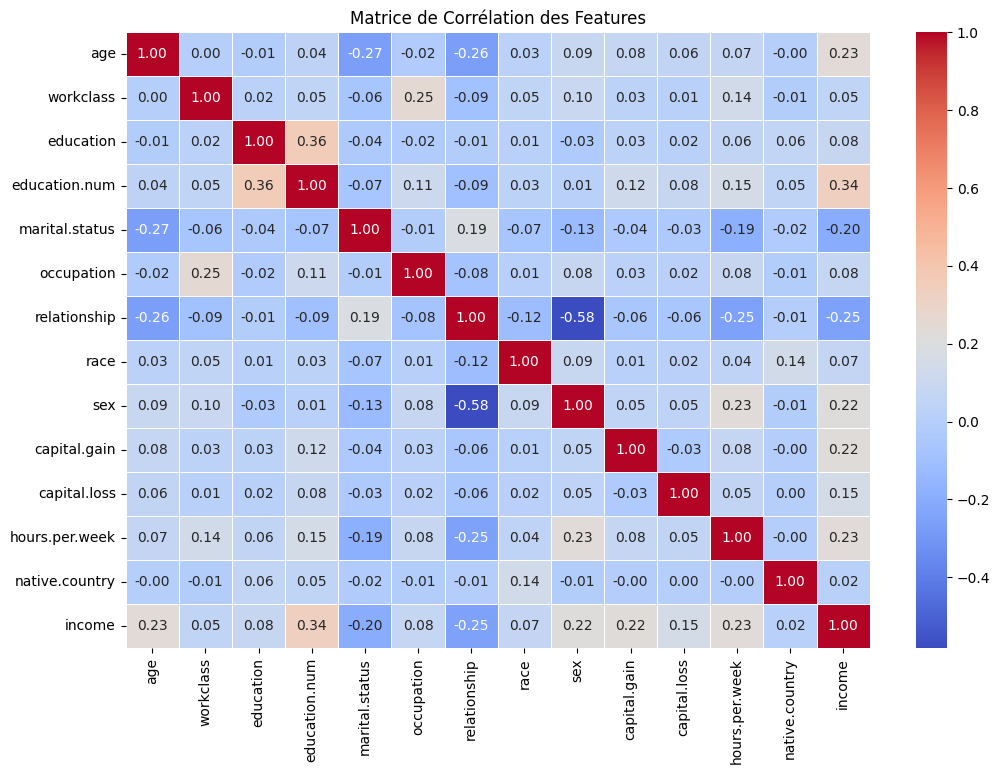

In [7]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation des Features")
plt.show()


In [8]:
# Sélection des features fortement corrélées avec 'income'
corr_threshold = 0.2
important_features = corr_matrix["income"].abs().sort_values(ascending=False)
selected_features = important_features[important_features > corr_threshold].index.tolist()
selected_features.remove("income")

print("Features sélectionnées pour le clustering :", selected_features)


Features sélectionnées pour le clustering : ['education.num', 'relationship', 'age', 'hours.per.week', 'capital.gain', 'sex']


In [9]:
# Extraire uniquement les colonnes utiles
df_selected = df[selected_features]

# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected)


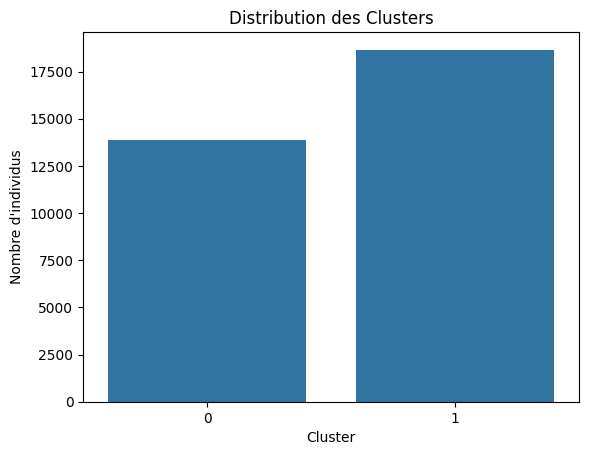

In [10]:
# Application de K-Means avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(df_scaled)

# Afficher la distribution des clusters
sns.countplot(x=df["Cluster"])
plt.title("Distribution des Clusters")
plt.xlabel("Cluster")
plt.ylabel("Nombre d'individus")
plt.show()


In [13]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df_scaled, df["Cluster"])
print(f"Silhouette Score du clustering : {silhouette_avg}")


Silhouette Score du clustering : 0.2853165057816366


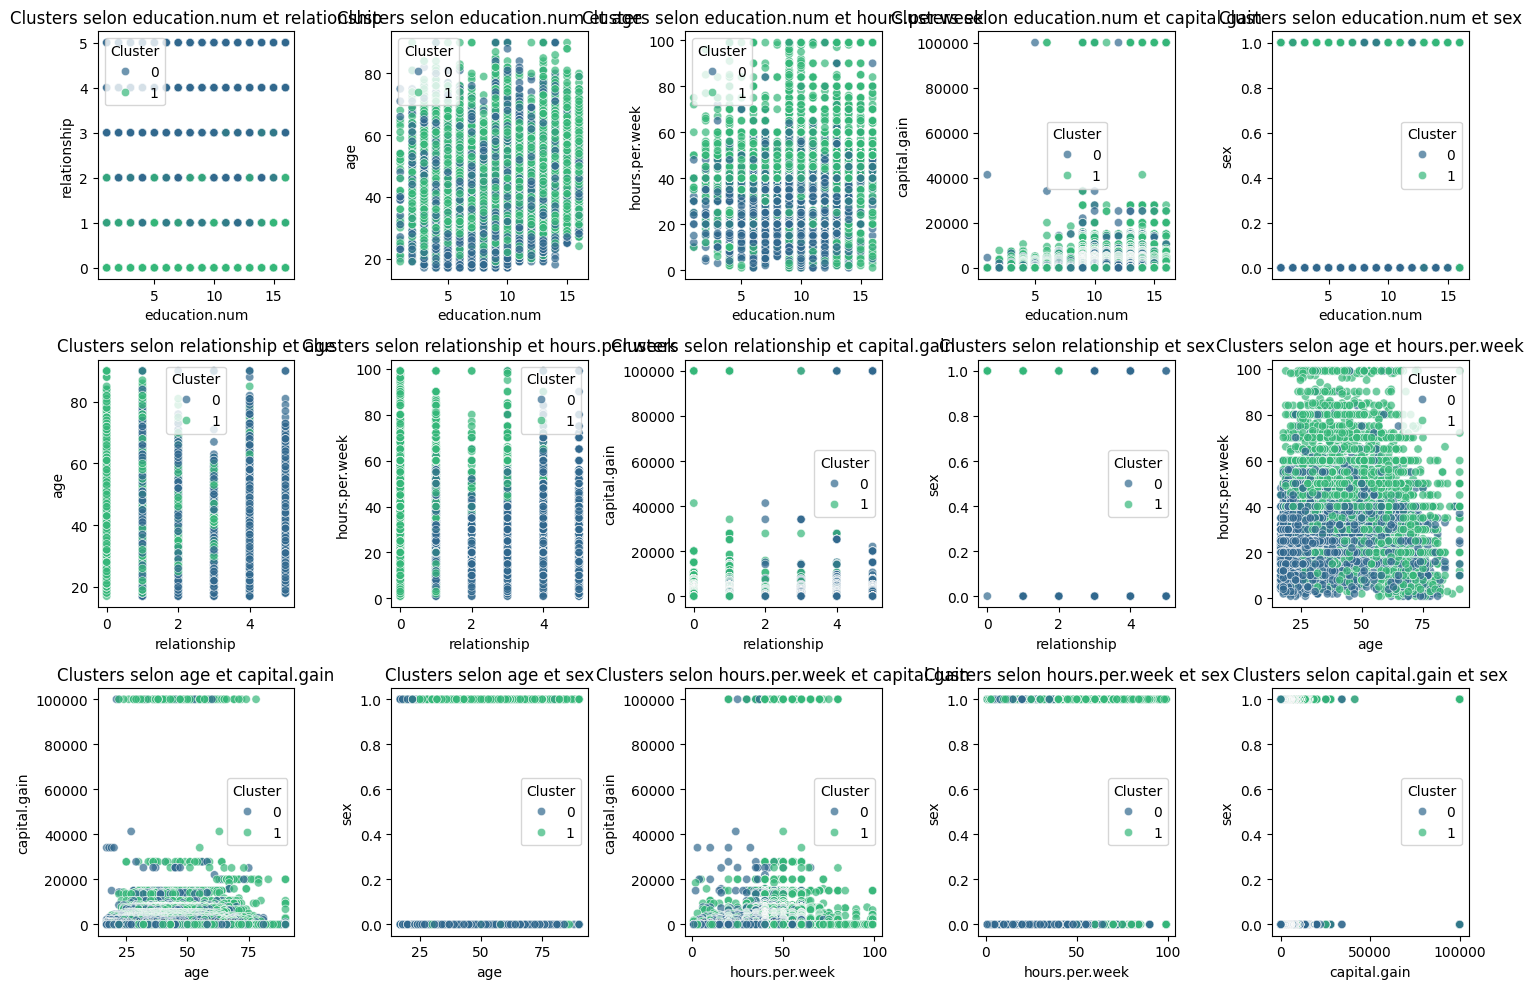

In [14]:
# Features sélectionnées
selected_features = ['education.num', 'relationship', 'age', 'hours.per.week', 'capital.gain', 'sex']

# Génération des scatter plots pour toutes les paires de features
plt.figure(figsize=(15, 10))
plot_index = 1

for i in range(len(selected_features)):
    for j in range(i+1, len(selected_features)):  # On évite les doublons
        plt.subplot(3, 5, plot_index)
        sns.scatterplot(x=df[selected_features[i]], y=df[selected_features[j]], hue=df["Cluster"], palette="viridis", alpha=0.7)
        plt.xlabel(selected_features[i])
        plt.ylabel(selected_features[j])
        plt.title(f"Clusters selon {selected_features[i]} et {selected_features[j]}")
        plot_index += 1

plt.tight_layout()
plt.show()


In [16]:
# Encoder les variables catégorielles
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(df_scaled)

# Afficher l'inertie du modèle
print(f"Inertie du modèle K-Means : {kmeans.inertia_:.2f}")

Inertie du modèle K-Means : 402431.25


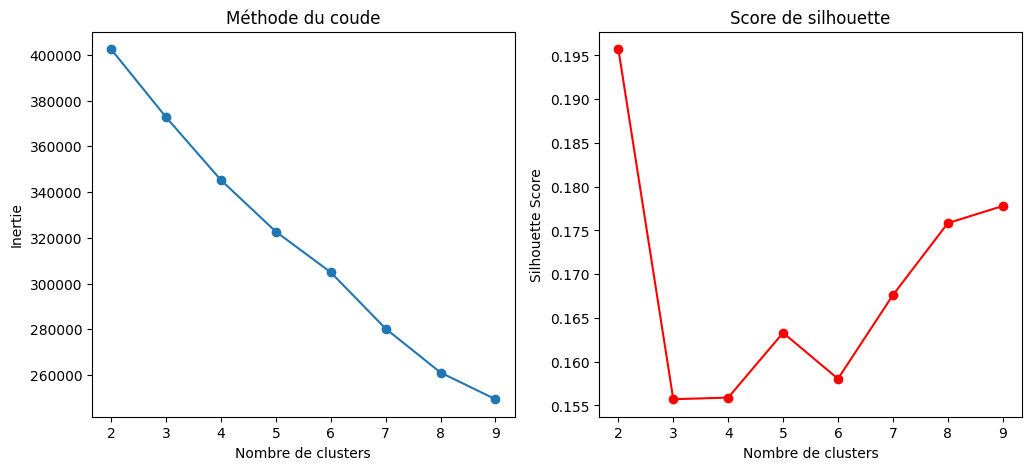

Meilleur nombre de clusters : 2
Meilleur algorithme : elkan
Inertie finale : 402431.24721457367
Nombre d'itérations nécessaires : 7


In [17]:
# ---- 1️⃣ Trouver le meilleur nombre de clusters (Elbow Method) ----
inertia = []
silhouette_scores = []
k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42, algorithm='lloyd')
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Affichage des courbes
plt.figure(figsize=(12, 5))

# Méthode du coude
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')

# Score de silhouette
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='red')
plt.xlabel('Nombre de clusters')
plt.ylabel('Silhouette Score')
plt.title('Score de silhouette')

plt.show()

# ---- 2️⃣ Tester les paramètres ----
best_k = k_values[np.argmax(silhouette_scores)]  # Meilleur k basé sur silhouette
best_algorithm = "elkan" if df_scaled.shape[0] > 10000 else "lloyd"  # Elkan pour gros dataset

# ---- 3️⃣ Vérification des autres paramètres ----
kmeans_optimized = KMeans(
    n_clusters=best_k,
    init='k-means++',
    n_init=20,
    max_iter=1000,
    tol=1e-5,
    random_state=42,
    algorithm=best_algorithm
)

kmeans_optimized.fit(df_scaled)
print(f"Meilleur nombre de clusters : {best_k}")
print(f"Meilleur algorithme : {best_algorithm}")
print(f"Inertie finale : {kmeans_optimized.inertia_}")
print(f"Nombre d'itérations nécessaires : {kmeans_optimized.n_iter_}")
